In [18]:
import csv
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('v_ma_formatted.csv')

In [20]:
df.head()

,PERMNO,date,TICKER,PRC,ewretd,RETURNS
0,91233,20080319,MA,208.39000,-0.017066,0.000000
1,91233,20080320,MA,220.38000,0.014587,0.057536
2,91233,20080324,MA,216.50000,0.021720,-0.017606
3,91233,20080325,MA,224.98000,0.010894,0.039169
4,91233,20080326,MA,222.85001,-0.002748,-0.009467


In [21]:
df_ma = df[:2214]
df_visa = df[2214:]

In [22]:
df_ma.tail()

,PERMNO,date,TICKER,PRC,ewretd,RETURNS
2209,91233,20161223,MA,104.71,0.004891,0.003835
2210,91233,20161227,MA,104.80,0.003181,0.000860
2211,91233,20161228,MA,103.68,-0.007221,-0.010687
2212,91233,20161229,MA,103.77,0.001362,0.000868
2213,91233,20161230,MA,103.25,-0.001826,-0.005011


In [23]:
df_visa.head()

,PERMNO,date,TICKER,PRC,ewretd,RETURNS
2214,92611,20080319,V,56.50,-0.017066,0.000000
2215,92611,20080320,V,64.35,0.014587,0.138938
2216,92611,20080324,V,59.73,0.021720,-0.071795
2217,92611,20080325,V,63.25,0.010894,0.058932
2218,92611,20080326,V,63.96,-0.002748,0.011225


In [24]:
df_ma_returns = df_ma["RETURNS"].tolist()

In [25]:
df_ma_date = df_ma["date"].tolist()
df_ma_date = pd.to_datetime([str(i) for i in df_ma_date], format='%Y%m%d')

In [26]:
df_visa_returns = df_visa["RETURNS"].tolist()

In [27]:
df_visa_date = df_visa["date"].tolist()
df_visa_date = pd.to_datetime([str(i) for i in df_visa_date], format='%Y%m%d')

In [28]:
len(df_ma_returns)

2214

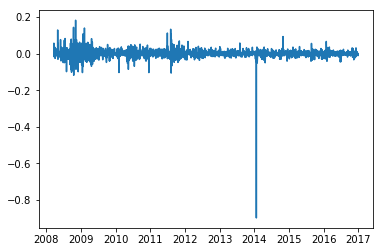

In [29]:
plt.plot(df_ma_date, df_ma_returns)
plt.show()

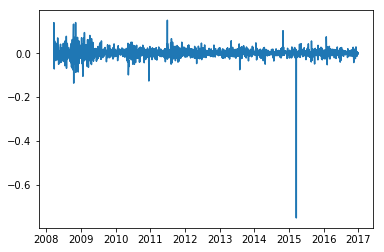

In [30]:
plt.plot(df_visa_date, df_visa_returns)
plt.show()

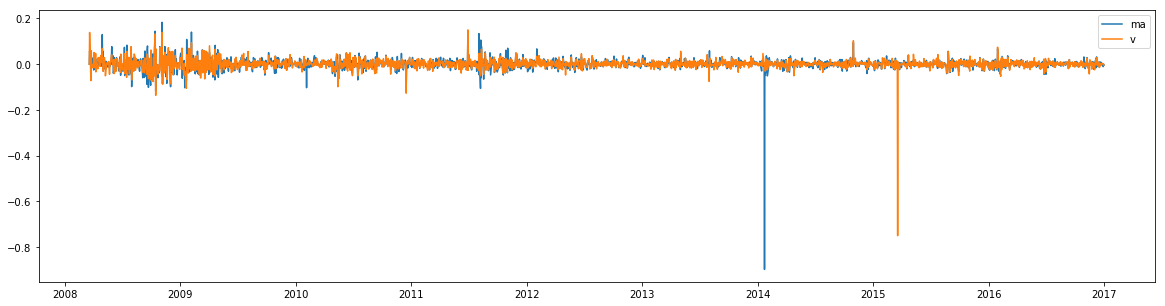

In [31]:
fig = plt.figure(figsize=(20, 5))
graph = fig.add_subplot(111)
graph.plot(df_ma_date, df_ma_returns ,label='ma')
graph.plot(df_visa_date, df_visa_returns, label='v')
plt.legend()
plt.show()

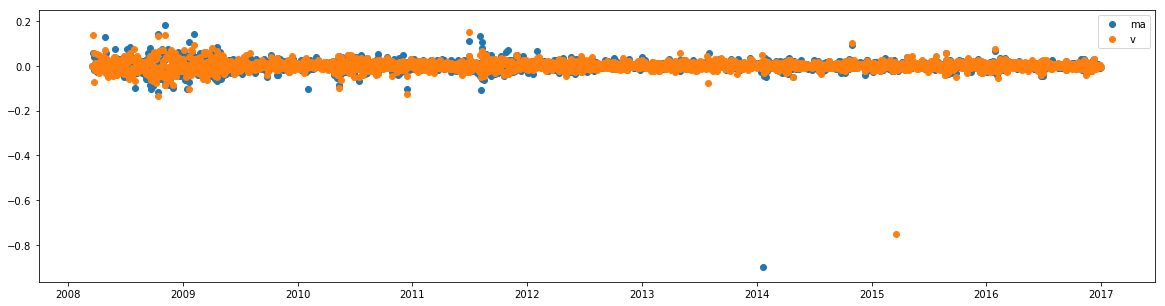

In [32]:
fig = plt.figure(figsize=(20, 5))
graph = fig.add_subplot(111)
graph.scatter(df_ma_date, df_ma_returns ,label='ma')
graph.scatter(df_visa_date, df_visa_returns, label='v')
plt.legend()
plt.show()